# Home Exercise on Sentiment Analysis
# Overview
In this exercise, we develop a model that suggests similar products based on a given item. We utilize `Word2Vec()` to train the model and construct a recommendation system.

Data: https://www.kaggle.com/datasets/samantas2020/online-retail-xlsx

Steps to Solve This Exercise

+ Data preprocessing (Download, Handle Missing Value and Split dataset (train set: 90%,test set:10%))

+ Build a representation model for products in the training dataset. (Model, Vocabulary and Training)

+ Visualize word2vec Embeddings

+ Build a function to compute the similarity of products.

+ This result is based on the vector of a single product.
What happens if we want to recommend products to a customer based on the products they have previously chosen?

# Step 1: Data preprocessing (Download, Handle Missing Value and Split dataset (train set: 90%,test set:10%))

In [157]:
!gdown --id 17xr-J-13RoiCCTRXqxWmvlEIbkAY3DPN -O "Online Retail.xlsx"


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17xr-J-13RoiCCTRXqxWmvlEIbkAY3DPN
To: /content/Online Retail.xlsx
100% 23.7M/23.7M [00:00<00:00, 42.5MB/s]


In [158]:
import pandas as pd

retail_df = pd.read_excel('/content/Online Retail.xlsx')

In [159]:
print(retail_df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [160]:
print(retail_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [161]:
print(retail_df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


**Since it have many row with N/A values so we have to process this by dropping all row that have N/A values**

In [162]:
retail_df.dropna(inplace=True)

print(retail_df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# Preprocessing data

**Change type of "InvoiceNo" to string and change type of "CustomerID" to INT**

In [163]:
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype(str)
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df = retail_df[retail_df["Quantity"] > 0]

In [164]:
import re

def preprocess_description(desc):
    desc = desc.lower().strip()
    desc = re.sub(r'[^a-z\s]', '', desc)
    desc = re.sub(r'\s+', ' ', desc)
    return desc

retail_df['Description'] = retail_df['Description'].apply(preprocess_description)

In [165]:
print(retail_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB
None


# Spilt data (train set: 90%,test set:10%))

In [166]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(retail_df, test_size=0.1, random_state=42)

# Step 2: Build a representation model for products in the training dataset. (Model, Vocabulary and Training)

In [167]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [168]:
transactions = train_df.groupby("InvoiceNo")["Description"].apply(list).tolist()

# Train Word2Vec Model
model = Word2Vec(sentences=transactions, vector_size=100, window=5, min_count=5, workers=4)

# Step 3: Visualizing Word2Vec Embeddings

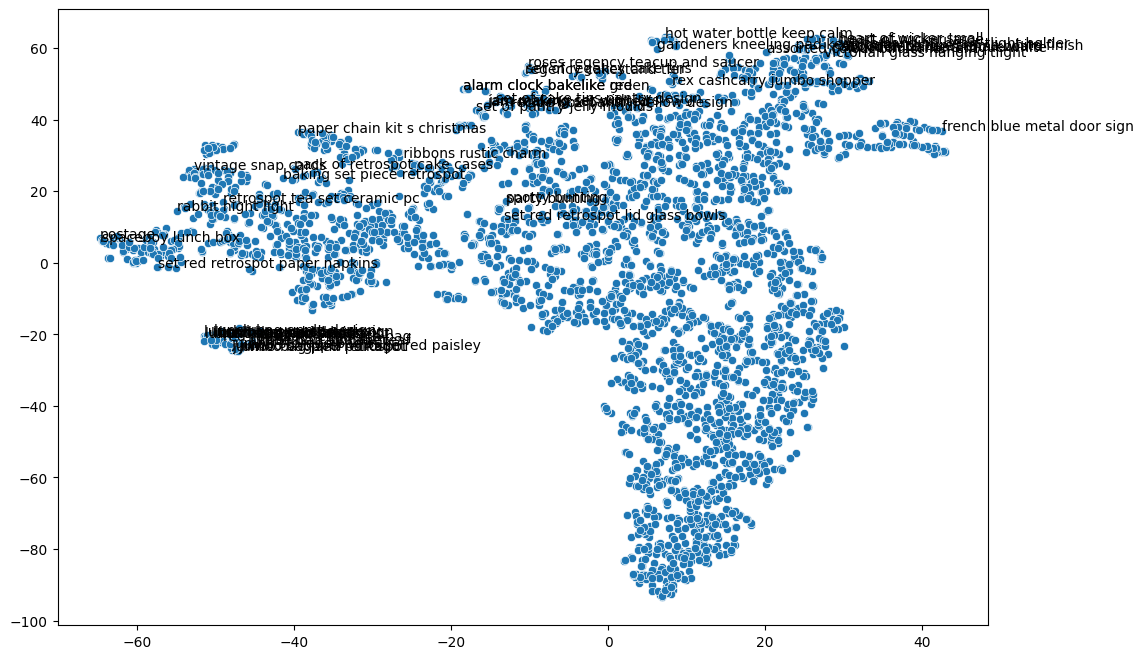

In [169]:
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot embeddings
plt.figure(figsize=(12, 8))
sns.scatterplot(x=word_vectors_2d[:, 0], y=word_vectors_2d[:, 1])
for i, word in enumerate(words[:50]):  # Plot only top 50 words for clarity
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
plt.show()

# Step 4: Build a function to compute the similarity of products.**bold text**

In [170]:
def recommend_similar_products(model, product_name, top_n=5):
    if product_name in model.wv:
        similar_items = model.wv.most_similar(product_name, topn=top_n)
        return similar_items
    else:
        return "Product not in vocabulary"


In [171]:
# Test Recommendation Function
sample_product = "white metal lantern"
recommendations = recommend_similar_products(model, sample_product, top_n=5)
print(f"Top 5 recommendations for '{sample_product}':", recommendations)

Top 5 recommendations for 'white metal lantern': [('colour glass tlight holder hanging', 0.9856374263763428), ('welcome wooden block letters', 0.9829232096672058), ('candleholder pink hanging heart', 0.9820200204849243), ('doormat smiley cats', 0.976114809513092), ('triple hook antique ivory rose', 0.968737006187439)]


In [172]:
from sklearn.metrics import precision_score

# Function to evaluate recommendation quality
def evaluate_recommendations(model, test_df, top_n=5):
    hit_count = 0  # Count how many times we recommend a relevant product
    total_count = 0
    reciprocal_ranks = []

    test_products = test_df.groupby("InvoiceNo")["Description"].apply(list).tolist()  # Group by transaction

    for purchase_list in test_products:
        # Use first product in transaction as the input product (for simplicity)
        input_product = purchase_list[0]
        if input_product not in model.wv:
            continue  # Skip products not in the model

        recommended_products = [rec[0] for rec in recommend_similar_products(model, input_product, top_n)]

        # Check if any of the actual purchased products are in recommendations
        hits = [1 if product in recommended_products else 0 for product in purchase_list[1:]]  # Ignore first product
        hit_count += sum(hits)
        total_count += len(purchase_list) - 1

        # Compute reciprocal rank
        for rank, product in enumerate(recommended_products, start=1):
            if product in purchase_list[1:]:  # Ignore first product
                reciprocal_ranks.append(1 / rank)
                break
        else:
            reciprocal_ranks.append(0)

    hit_rate = hit_count / total_count if total_count > 0 else 0
    mean_reciprocal_rank = np.mean(reciprocal_ranks) if reciprocal_ranks else 0

    print(f"Hit Rate: {hit_rate:.4f}")
    print(f"Mean Reciprocal Rank (MRR): {mean_reciprocal_rank:.4f}")

# Run evaluation
evaluate_recommendations(model, test_df, top_n=5)


Hit Rate: 0.0211
Mean Reciprocal Rank (MRR): 0.0224


# Step 5: This result is based on the vector of a single product. What happens if we want to recommend products to a customer based on the products they have previously chosen?

**1. Collect Customer Purchase History**

Gather all the products the customer has previously purchased.

Ensure the product names match those used in the Word2Vec model.

**2. Compute the Customer's Preference Vector**

Convert each purchased product into its corresponding vector representation using the trained Word2Vec model.

If multiple products were purchased, compute the average vector of all purchased product vectors.

**3. Find Similar Products**

Use cosine similarity to compare the customer’s preference vector with all product vectors in the model.

Retrieve the top-N most similar products as recommendations.

**4. Filter & Rank Recommendations**

Exclude products the customer has already purchased.

Rank recommended products based on similarity scores.

**5. Present Recommendations**

Display recommendations in a structured format (list, table, or personalized message).

Optionally, provide additional metadata like price, category, or discount.

In [173]:
def recommend_for_customer(model, customer_purchases, top_n=5):
    """
    Recommends products based on a customer's purchase history.

    Args:
        model (Word2Vec): Trained Word2Vec model.
        customer_purchases (list): List of product names the customer bought.
        top_n (int): Number of recommendations to return.

    Returns:
        list: Top-N recommended products.
    """
    valid_products = [product for product in customer_purchases if product in model.wv]

    if not valid_products:
        return "No valid products found in the model vocabulary."

    # Compute average vector of valid purchased products
    customer_vector = np.mean([model.wv[word] for word in valid_products], axis=0)

    # Get recommendations
    recommendations = model.wv.similar_by_vector(customer_vector, topn=top_n)

    return recommendations

# Example: Recommending for a customer
customer_purchases = ["white metal lantern", "knitted union flag hot water bottle"]
customer_recommendations = recommend_for_customer(model, customer_purchases, top_n=5)
print("Recommended products based on customer's purchase history:", customer_recommendations)


Recommended products based on customer's purchase history: [('doormat black flock', 0.9766108989715576), ('doormat smiley cats', 0.9732340574264526), ('large ivory heart wall organiser', 0.9720487594604492), ('doormat topiary', 0.9697655439376831), ('small ivory heart wall organiser', 0.9645208120346069)]
